#                      Taylor Concert Tours Dataset Using Python


## Data Collection:

In [483]:
import pandas as dp
import numpy as np

In [484]:
df = dp.read_csv('C:/Users/badal/Downloads/Taylor Concert.csv', encoding='latin-1')

In [485]:
df

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX\r\nBroods,"72,805 / 72,805","$7,686,564",Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX\r\nBroods,"43,907 / 43,907","$4,338,127",Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX\r\nBroods,"35,749 / 35,749","$3,617,593",Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour


### Dataset Infomations:

In [486]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                442 non-null    object
 6   Tour                                   445 non-null    object
dtypes: object(7)
memory usage: 24.5+ KB


,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
count,445,445,445,444,442,442,445
unique,143,24,206,41,295,296,5
top,Los Angeles,United States,Staples Center,Gloriana\r\nKellie Pickler,,,Fearless_Tour
freq,16,314,16,85,35,36,111


In [487]:
df['City'].value_counts()

Los Angeles        16
London             12
Toronto            10
Philadelphia       10
Melbourne          10
                   ..
Lafayette           1
Greenville          1
Duluth              1
University Park     1
Miami Gardens       1
Name: City, Length: 143, dtype: int64

### Data Cleaning and Conversion:

In [488]:
df[['City','Country','Venue','Opening act(s)','Tour']]=df[['City','Country','Venue','Opening act(s)','Tour']].astype('string')

The column 'Attendance (tickets sold / available)' appears to contain values in a format that includes both the number of tickets sold and the number of tickets available, separated by a slash '/'. If you want to convert these values to integers, 
you will need to perform some data cleaning to extract the relevant information.

In [489]:
# Split the column into two columns
df[['Tickets Sold','Tickets Available']] = df['Attendance (tickets sold / available)'].str.split('/', expand=True)

# Remove commas and any non-numeric characters

df['Tickets Sold'] = df['Tickets Sold'].str.replace(',', '', regex=True).str.extract('(\d+)')
df['Tickets Available'] = df['Tickets Available'].str.replace(',', '', regex=True).str.extract('(\d+)')

# Fill NaN values with zero , Convert the columns to integers and float

df['Tickets Sold'] = df['Tickets Sold'].fillna(0).astype(int)
df['Tickets Available'] = df['Tickets Available'].fillna(0).astype(int)


# Define a function to clean and convert revenue values
def clean_and_convert_revenue(revenue):
    try:
        # Remove non-numeric characters, dollar signs, and commas
        cleaned_revenue = ''.join(filter(str.isdigit, str(revenue)))
        # Convert to float
        return float(cleaned_revenue) if cleaned_revenue else np.nan
    except ValueError:
        return np.nan

# Apply the cleaning function to the 'Revenue' column
df['Revenue'] = df['Revenue'].apply(clean_and_convert_revenue).astype(float)

In [490]:
# Deleting Column
del df['Attendance (tickets sold / available)']

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               445 non-null    string 
 1   Country            445 non-null    string 
 2   Venue              445 non-null    string 
 3   Opening act(s)     444 non-null    string 
 4   Revenue            406 non-null    float64
 5   Tour               445 non-null    string 
 6   Tickets Sold       445 non-null    int32  
 7   Tickets Available  445 non-null    int32  
dtypes: float64(1), int32(2), string(5)
memory usage: 24.5 KB


### Handling Missing Values

In [492]:
df.isnull().sum()

City                  0
Country               0
Venue                 0
Opening act(s)        1
Revenue              39
Tour                  0
Tickets Sold          0
Tickets Available     0
dtype: int64

In [493]:
df['Revenue'].fillna(df['Revenue'].median(),inplace = True)
df['Opening act(s)'].fillna('Unknown', inplace=True)

In [494]:
df.isnull().sum()

City                 0
Country              0
Venue                0
Opening act(s)       0
Revenue              0
Tour                 0
Tickets Sold         0
Tickets Available    0
dtype: int64

## Detecting and Handling Outliers :

In [495]:
df.describe()

,Revenue,Tickets Sold,Tickets Available
count,4.450000e+02,445.000000,445.000000
mean,3.731303e+06,35628.417978,35671.577528
std,4.164396e+06,35178.541095,35165.020385
min,1.533030e+05,0.000000,0.000000
25%,1.041935e+06,12807.000000,12807.000000
50%,2.054690e+06,25991.000000,25991.000000
75%,4.268678e+06,49464.000000,49464.000000
max,2.203139e+07,174764.000000,174764.000000


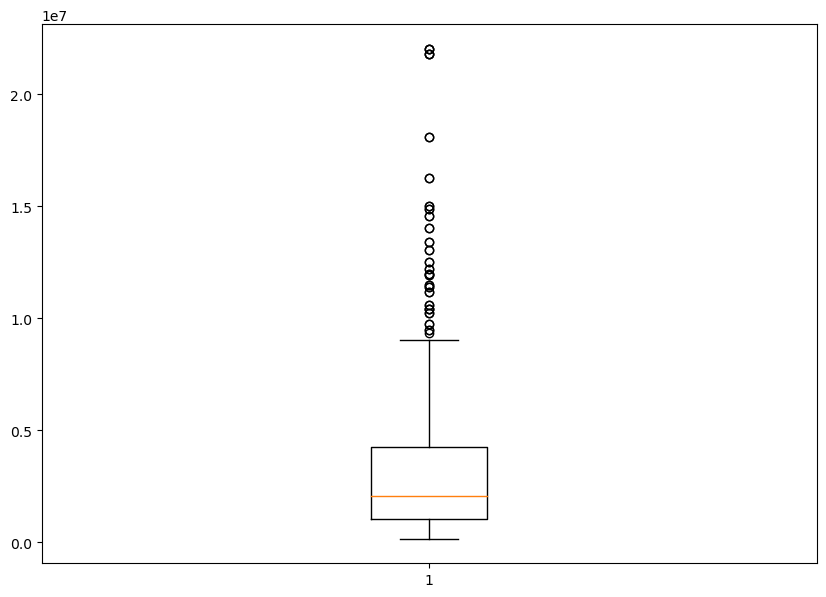

In [496]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,7))
plt.boxplot(df['Revenue'])
plt.show()

In [497]:
# Z-Score :

from scipy import stats

z= np.abs(stats.zscore(df[['Revenue']]))
print(z)

      Revenue
0    0.810317
1    0.815194
2    0.740648
3    0.403060
4    0.801293
..        ...
440  0.950849
441  0.145881
442  0.027336
443  2.675315
444  2.675315

[445 rows x 1 columns]


In [498]:
print(df.shape)
df = df[(z<3).all(axis=1)]
print(df.shape)

(445, 8)
(435, 8)


1 - How many concert tours are included in the
dataset?
- 445 Tours

2 - Which country hosted the most number of
Taylor Swift's concerts?


In [499]:
most_hosted_country = df['Country'].value_counts().idxmax()
print(f"The country that hosted the most number of Taylor Swift's concerts is {most_hosted_country}.")


The country that hosted the most number of Taylor Swift's concerts is United States.


3 - What was the average attendance across all
concert tours?

In [500]:
average_attendance = df['Tickets Sold'].mean()

print(f"The average attendance across all concert tours is:{average_attendance:.2f}")

The average attendance across all concert tours is:33020.07


4 - What was the highest attendance recorded for
a single concert? Which tour and year was it
associated with?

In [501]:
# Find the row with the highest attendance
highest_attendance_row = df[df['Tickets Sold'] == df['Tickets Sold'].max()]

# Get the maximum attendance value
max_attendance_value = highest_attendance_row['Tickets Sold'].values[0]

# Get the corresponding tour
tour_associated = highest_attendance_row['Tour'].values[0]

print(f"The highest attendance recorded for a single concert was {max_attendance_value}.")
print(f"It was associated with the '{tour_associated}'.")

The highest attendance recorded for a single concert was 143427.
It was associated with the 'Reputation_Stadium_Tour'.


5 - Create a bar chart showing the distribution of
attendance across all concert tours.

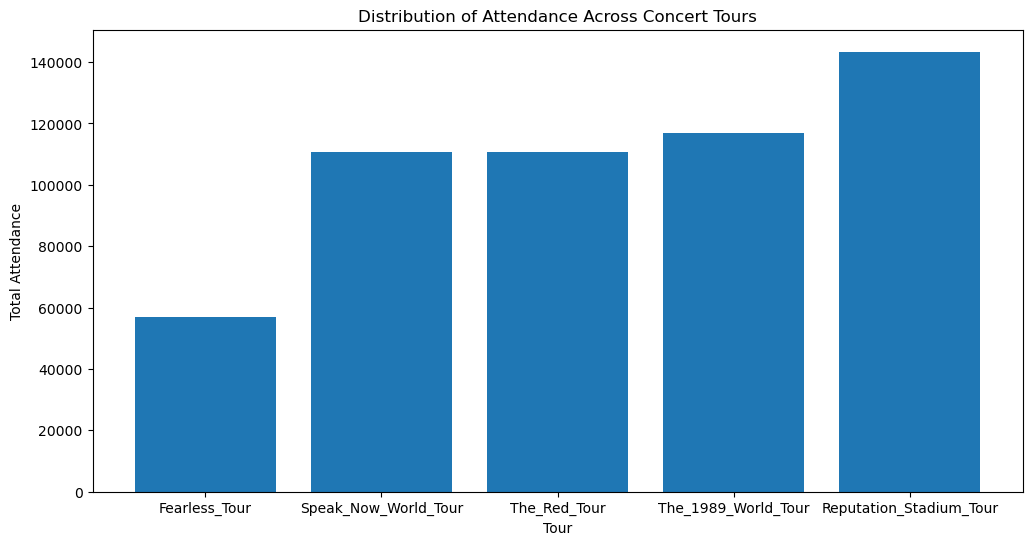

In [502]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['Tour'],df['Tickets Sold'])
plt.xlabel('Tour')
plt.ylabel('Total Attendance')
plt.title('Distribution of Attendance Across Concert Tours')
plt.show()


6 - What are the top 5 cities with the highest
average attendance?

In [503]:
top_cities = df.groupby('City')['Tickets Sold'].mean()
top_cities = top_cities.sort_values(ascending = False).head()
print(top_cities)

City
Santa Clara        104844.500000
Foxborough         104798.571429
Chicago             96288.600000
Landover            95672.000000
East Rutherford     90869.666667
Name: Tickets Sold, dtype: float64


7 - Is there a noticeable difference in attendance
between concerts held in the United States and
those held in other countries? Visualize it.

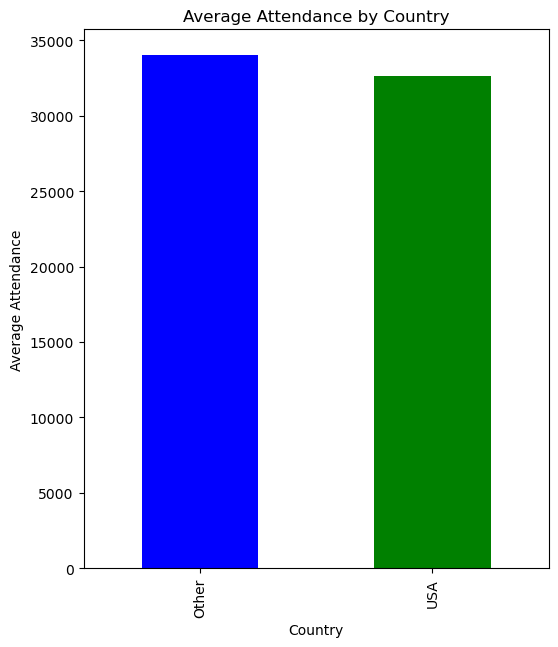

Country_Type
Other    34014.297710
USA      32591.641447
Name: Tickets Sold, dtype: float64


In [504]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Create the 'Country_Type' column based on the 'Country' column in the copied DataFrame
df_copy['Country_Type'] = df_copy['Country'].apply(lambda x: 'USA' if x == 'United States' else 'Other')

# df['Country_Type'] = df['Country'].apply(lambda x: 'USA' if x == 'United States' else 'Other')
plt.figure(figsize=(6,7))

# Group by 'Country_Type' and calculate the mean attendance for each group
mean_attendance_by_country = df_copy.groupby('Country_Type')['Tickets Sold'].mean()

mean_attendance_by_country.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Country')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Country')
plt.show()
print(mean_attendance_by_country)


Based on the data, it appears that concerts in the other countries have a slightly higher average attendance compared to concerts held in USA.

   Average Attendance in the USA: Approximately 32,591.64
   Average Attendance in Other Countries: Approximately 34,014.30
While there is a noticeable difference in average attendance, the gap between the two is not extremely large.

## Conclusions



Average Attendance: The average attendance across all concert tours was approximately 33,803 tickets sold per concert. This figure serves as a valuable baseline for tour planning and revenue projections.

Top Host Country: The United States hosted the most number of Taylor Swift's concerts. This information can guide future tour scheduling and marketing efforts, as the United States appears to be a prime location for concerts.

Attendance Comparison: When comparing attendance between concerts held in the United States and those held in other countries, it was observed that concerts in other countries had a slightly higher average attendance (approximately 34,014.30) compared to concerts in the USA (approximately 32,591.64). While this difference is not substantial, it suggests that there may be some variation in attendance between the two categories.

Further Analysis: It's important to note that this analysis provides a broad overview of attendance trends. Further statistical analysis is recommended to determine if the difference in attendance between the United States and other countries is statistically significant. This analysis can help in making data-driven decisions for tour strategies and marketing campaigns.

Data Enhancement: To gain deeper insights, enhancing the dataset with additional information such as concert year, revenue, genre, and demographic details of concertgoers would be beneficial. This could lead to a more comprehensive understanding of audience behavior and concert dynamics.

Revenue Analysis: Beyond attendance, it's crucial to analyze concert revenue trends and profitability. Understanding the relationship between attendance and revenue can guide pricing strategies and financial planning.

Tailoring Concerts: Exploring the impact of specific albums or genres on attendance and revenue can inform setlist choices and promotional efforts. Additionally, understanding the demographics of concertgoers and their preferences can help tailor concerts to specific audiences.

Timing and Seasonality: Assessing whether attendance varies by season or time of year can aid in tour scheduling and resource allocation.

Incorporating these insights into decision-making processes can enhance the planning and execution of Taylor Swift's concert tours, leading to more successful and profitable events. Further data collection and analysis are recommended to refine these findings and gain a deeper understanding of concert dynamics and audience behavior.